# Credit Card Fraud - Prediction 

Credit card frauds are the most common crimes that are happening today. This notebook has been designed to predict a transaction as fraudulent based on the correlated features. The objective is to understand the functioning of SVM model and improvising an imbalanced dataset. Another important learning feature is to understand the creation of a learning curve to know if the model has high bias or variance or neither.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix

Using TensorFlow backend.


In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df1 = df.loc[:,'V1':'V28']
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


Scaling Time and amount features

In [7]:

df_s = StandardScaler().fit_transform(df[['Time','Amount']])
df_s = pd.DataFrame(df_s)
df1['Time'] = df_s[0]
df1['Amount']= df_s[1]
df1['Class'] = df['Class']
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996583,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996583,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996562,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996562,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996541,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,1.641931,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,1.641952,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,1.641974,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,1.641974,-0.313249,0


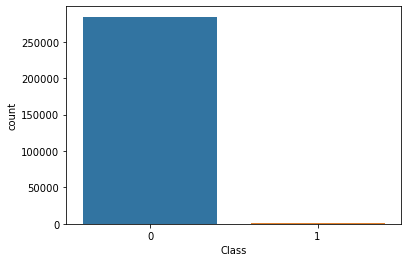

In [8]:
sns.countplot('Class',data=df)

Since there is a heavy imbalance in the catergory class. Random sampling is done to have equal training examples in both the class types.

In [9]:
X = df1.drop(columns='Class')
y = df1['Class']
sampler = RandomUnderSampler(random_state=100)
X_sample,y_sample = sampler.fit_sample(X,y)

In [10]:
df_sample = pd.concat([X_sample,y_sample],axis=1)
df_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,0.046137,0.881214,0.302074,-0.585253,0.417586,-1.128904,1.018863,-0.216100,-0.066571,-0.414195,...,-0.557688,0.066127,0.043527,-0.486044,0.137287,0.248573,0.097720,1.013542,-0.345273,0
1,-1.591957,1.713539,0.269043,0.064271,-0.790288,-0.398922,-0.009796,0.833390,0.186435,-0.156110,...,-0.492714,-0.039830,-0.100515,0.270056,0.276989,0.096303,0.060185,-0.550830,-0.197104,0
2,1.205217,-0.143317,0.341558,0.650223,-0.286586,0.118432,-0.253357,0.091103,0.744127,-0.258851,...,-0.044282,-0.116956,-0.373154,0.535269,0.605666,-0.013150,0.001013,-0.751744,-0.293298,0
3,0.094646,0.746711,-0.050365,-0.748041,0.651131,-0.726142,0.908008,-0.083481,0.209904,-0.371125,...,-0.819738,-0.005201,-0.759517,-0.433912,0.189392,0.237128,0.086976,1.188870,-0.337277,0
4,-2.506276,-3.830851,-2.597559,-1.185391,-5.755348,1.366631,7.924229,-2.264307,-3.062299,0.411020,...,1.316135,1.640480,1.005380,0.784796,0.279200,0.325590,-0.631457,0.782494,6.575454,0


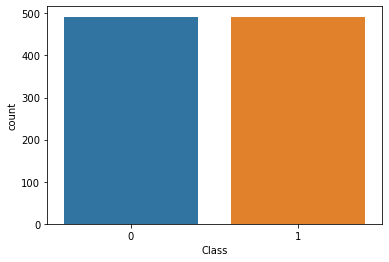

In [11]:
sns.countplot('Class',data=df_sample)

Now, both the categories are equivalent. Model development can be done.

In [12]:
df_sample.corr().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
V1,1.00,-0.81,0.88,-0.61,0.86,0.31,0.88,-0.09,0.66,0.74,...,-0.04,-0.05,-0.07,-0.08,0.05,0.18,0.19,0.24,-0.03,-0.43
V2,-0.81,1.00,-0.86,0.68,-0.78,-0.28,-0.85,-0.02,-0.69,-0.76,...,-0.02,0.13,0.00,0.12,0.02,-0.16,0.05,-0.20,-0.23,0.48
V3,0.88,-0.86,1.00,-0.77,0.85,0.45,0.88,-0.17,0.76,0.85,...,-0.06,-0.03,0.03,-0.10,-0.01,0.09,0.12,0.13,-0.01,-0.57
V4,-0.61,0.68,-0.77,1.00,-0.57,-0.41,-0.71,0.11,-0.79,-0.80,...,0.11,0.01,-0.10,-0.01,0.15,-0.01,-0.07,-0.20,-0.01,0.71
V5,0.86,-0.78,0.85,-0.57,1.00,0.25,0.81,-0.21,0.66,0.75,...,-0.10,-0.11,-0.13,-0.09,0.05,0.17,0.18,0.26,-0.16,-0.36
V6,0.31,-0.28,0.45,-0.41,0.25,1.00,0.30,-0.57,0.36,0.41,...,0.01,0.34,-0.03,-0.14,-0.04,-0.14,-0.05,0.11,0.24,-0.38
V7,0.88,-0.85,0.88,-0.71,0.81,0.30,1.00,0.08,0.76,0.86,...,-0.11,-0.07,-0.03,0.05,0.01,0.24,0.12,0.21,0.17,-0.48
V8,-0.09,-0.02,-0.17,0.11,-0.21,-0.57,0.08,1.00,-0.08,-0.05,...,0.03,-0.41,0.08,0.24,0.05,0.29,-0.01,-0.14,0.01,0.06
V9,0.66,-0.69,0.76,-0.79,0.66,0.36,0.76,-0.08,1.00,0.84,...,-0.24,-0.05,0.02,0.00,-0.11,0.14,0.14,0.15,0.02,-0.55
V10,0.74,-0.76,0.85,-0.80,0.75,0.41,0.86,-0.05,0.84,1.00,...,-0.21,-0.05,0.01,0.01,-0.04,0.15,0.13,0.20,0.00,-0.62


Based on correlation, few columns are related with the class column as follows

1. V2
2. V3
3. V4
4. V7
5. V9
6. V10
7. V11
8. V12
9. V14
10. v16
11. v17
12. v18


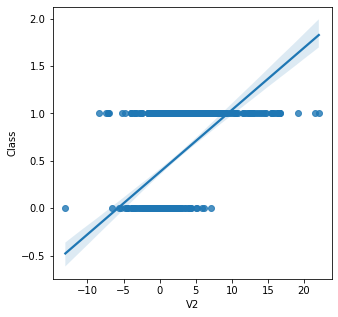

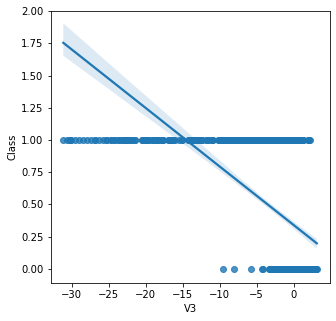

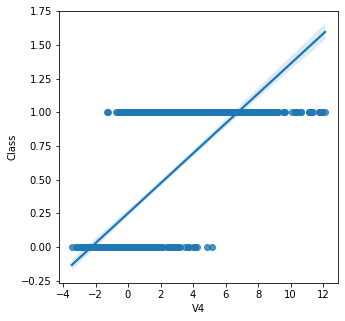

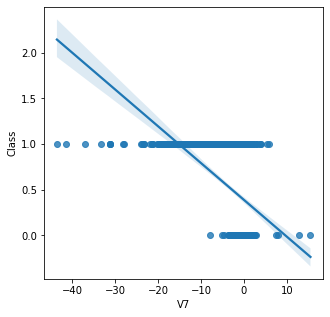

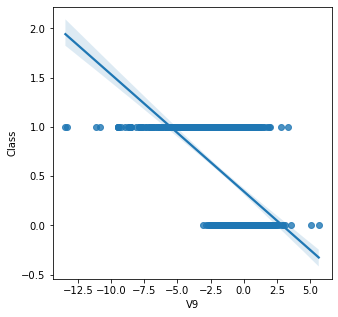

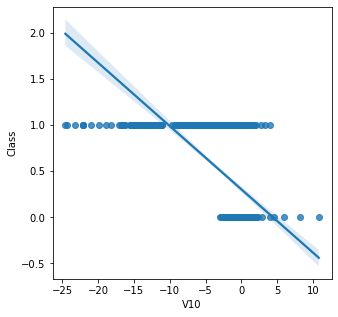

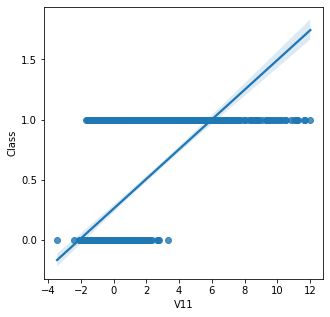

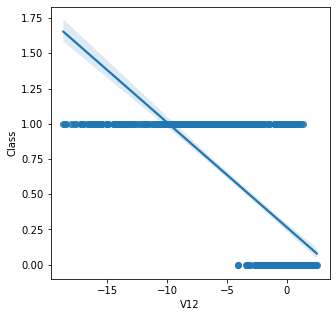

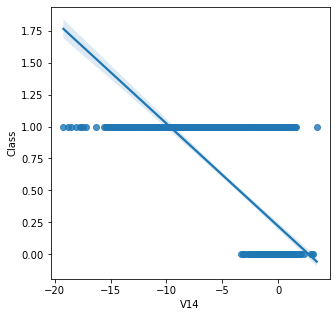

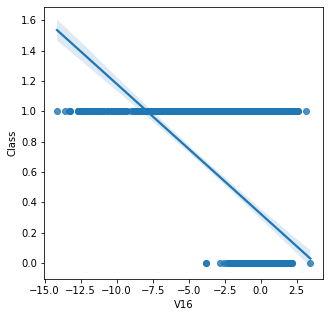

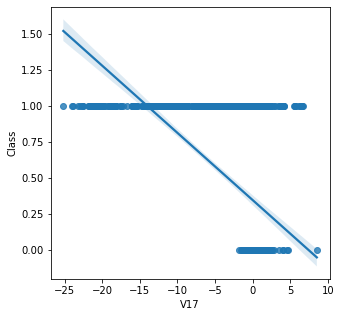

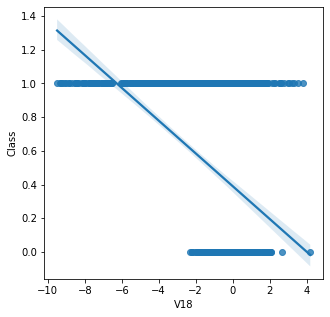

In [13]:
col = df_sample[['V2','V3','V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']]

for i in col:
             plt.subplots(1,1,figsize=(5,5))
             sns.regplot(i,df_sample['Class'],data=df_sample)

In [14]:
X = col
y =df_sample['Class']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

Since the number of training examples is more than the number of features, a SVM model with linear kernal is suitable for the prediction. However, the accuracy of the algorithm towards this dataset has to be proved using cross-validation and learning curves analysis.

## Cross - validation

In [16]:
from sklearn.model_selection import StratifiedKFold,cross_val_predict,cross_val_score,learning_curve
folds = StratifiedKFold()
sv = svm.SVC()
cv_Score = cross_val_score(sv,x_train,y_train,cv=folds)
print(cv_Score.mean().round(2))


0.93


Support vector model gives 93% accuracy when performing cross validation.

## Learning curve

In [17]:
import numpy as np
def plot_curve(estimator,x,y,cv=folds,m=np.linspace(0.1,1,5)):
    
                            
                            size,score_train,score_test = learning_curve(estimator,x,y,cv=cv,train_sizes=m)
                            train_mean = np.mean(score_train,axis=1)
                            train_std  = np.std(score_train,axis=1)
                            test_mean = np.mean(score_test,axis=1)
                            test_std = np.std(score_test,axis=1)
                           # plt.fill_between(size,train_mean - train_std,train_mean + train_std,alpha=0.1)
                           # plt.fill_between(size,test_mean - test_std,test_mean + test_std,alpha=0.1)
                            plt.plot(size,train_mean,label='Training examples')
                            plt.plot(size,test_mean,label='cross validation')
                            plt.legend()
                            plt.title('Learning curve between train and cv sets')
               

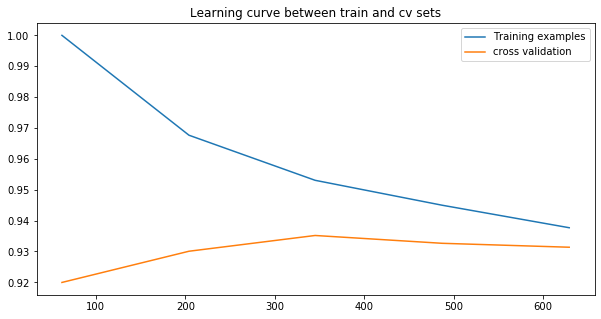

In [18]:
plt.figure(figsize=(10,5))
sv = svm.SVC(kernel='linear')
plot_curve(sv,x_train,y_train)

Based on the learning curve, the gap between the cv and train curves are neither too small(high bias) nor too large(high variance). Hence, SVM could be the right model to proceed with the predictions.

## Model development 

In [19]:
model = svm.SVC(kernel='linear').fit(x_train,y_train)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model Prediction

In [20]:
yhat = model.predict(x_test)

## Model Evaluation

In [21]:

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        98
           1       0.96      0.88      0.92        99

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



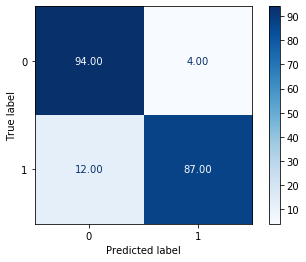

In [22]:
disp = plot_confusion_matrix(model,x_test,y_test,cmap='Blues',values_format='0.2f')

Based on the F1 score, precision and recall, the model is predicting an equivalent amount of fraud and non-fraud cases.

ROC AUC score: 0.9189857761286333


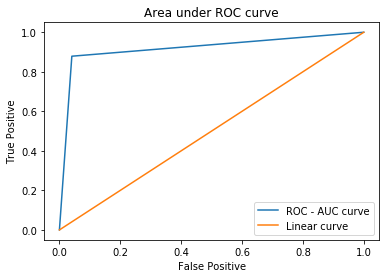

In [42]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
tp, fp, threshold = roc_curve(y_test,yhat)
auc_curve = auc(tp,fp)
print('ROC AUC score:',roc_auc_score(y_test,yhat))
plt.plot(tp,fp,label = 'ROC - AUC curve')
plt.plot([0,1],[0,1],label='Linear curve')
plt.title('Area under ROC curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()

Based on the ROC-AUC curve, the SVM model has 91% area covered under ROC curve.